In [ ]:
from IPython.display import YouTubeVideo, Markdown, SVG
from functools import partial
YouTubeVideo_formato = partial(YouTubeVideo, modestbranding=1, disablekb=0,
                               width=640, height=360, autoplay=0, rel=0, showinfo=0)

display(Markdown(filename='../preamble.md'))

# Interfaces de usuario en Jupyter <a class="tocSkip"></a>

> Jupyter y IPython permiten no solo visualizar datos sino también interactuar con ellos en tiempo real

Para lograr esto estudiaremos dos componentes 
- el módulo `display` con todas las opciones de salida enriquecida
- la librería `ipywidgets` para generar controles tipo GUI en el kernel de IPython

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import ipywidgets

# Módulo  [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)

Este módulo está instalado por defecto con el kernel de IPython

Hasta ahora sólo hemos usando la función `display`

```python
display(*objs, # Una tupla de objetos de Python
        ...)
```
Hemos visto que, al igual que `print`, esta función imprime el valor de los objetos de Python

> Sin embargo, `display` permite adicionalmente imprimir en la salida objetos multimedia como imágenes, audio, video y HTML: esto es lo que llamamos "salida enriquecida"

## (Nota complementaria) La función `__str__`

La forma en que se imprime un objeto con `print` o `display` está dado por la función interna `__str__` de dicho objeto

Los objetos básicos de `Python` (por ejemplo las listas) ya tienen su función `__str__` definida

Considere el siguiente ejemplo de una clase personalizada sin y con `__str__`

In [17]:
class Fruta:
    def __init__(self, color, nombre):
        self.color = color
        self.nombre = nombre
        
class Fruta_print(Fruta): # Esta clase hereda de Fruta        
    def __str__(self): # y le agrega esta función
        return f"Soy una {self.nombre} de color {self.color}"
    
a = Fruta('rojo', 'manzana')
print(a)
a = Fruta_print('rojo', 'manzana')
print(a)

Soy una manzana de color rojo


## Imprimiendo imágenes con el objeto `Image`

Usando este objeto podemos mostrar una imagen en formato JPG, PNG o GIF que esté en nuestro disco duro o una página web

Para mostrar una imagen llamada `mi_imagen.jpg` en nuestro directorio local 

```python
from IPython.display import Image
display(Image(filename="mi_image.JPG"))
```

los argumentos principales son

```python
Image(url, # dirección a una imagen en una página web
      filename, # path a una imagen en nuestro disco
      format, # Formato de la imagen, se infiere de la extensión del archivo
      embed, # Booleano: Permite que la imagen se guarde en la metadata del notebook
      width, # ancho del cuadro a mostrar, por defecto se usa el tamaño real de la imagen
      height, # alto del cuadro a mostrar
      ...
     )
```

> Recordemos que también se puede mostrar una imagen con `matplotlib` importándola con `imread` y dibujándola con `imshow`. Si sólo nos interesa mostrar la imagen y no vamos a ocupar su data entonces `Image` es más conveniente

## Reproducción de sonido con el objeto `Audio`

Proporciona un reproductor de sonido

Las opciones de entrada son:

1. Path a un archivo (por ejemplo `wav` o `ogg`)
1. URL apuntando un archivo
1. `ndarray` de una dimensión (mono), dos dimensiones (stereo) o más


**Ejercicio**

- Muestre la imagen `unidad1/img/valdivia.png` usando `display`

## Objeto `Video`

Crea un reproductor para un archivo, URL o stream de datos crudos (Bytes)

Existen también los objetos `YouTubeVideo` y `VimeoVideo` para embeber videos de estas plataformas

##  Código fuente formateado con el objeto `Code`

Muestra código fuente con sintaxis con colores

La entrada puede ser un path o un string 

## Objeto `HTML`

Renderea código escrito en HTML

La entrada puede ser un archivo local, una URL o un string

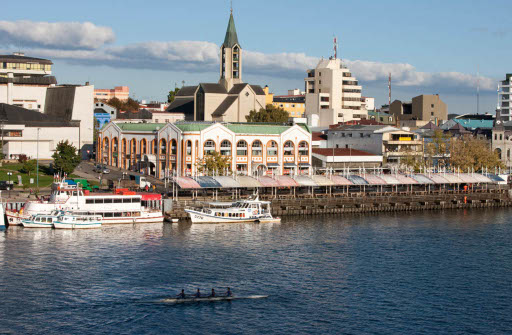

def funcion_interesante(n):
    """
    Este script es interesante
    """
    if n == 1:
        return 1

    else:
        return n * funcion_interesante(n-1)

if __name__ == '__main__':
    print(funcion_interesante(10))

a,b
b,c


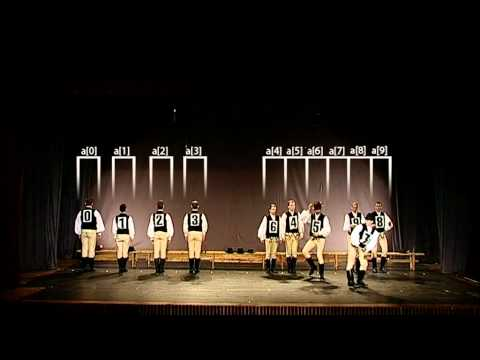

In [26]:
from IPython.display import Code, Image, Audio, HTML, YouTubeVideo
display(Image('img/valdivia.png'))
display(Code("script_interesante.py"))


t, dt = np.linspace(0.0, 0.5, num=20000, retstep=True); 
modulacion = np.cos(2.0*np.pi*t*220 + (100/8)*np.sin(2.0*np.pi*t*8))
pajarillo = scipy.signal.chirp(t, f0=5000, f1=3000, t1=t[-1], method='quadratic')

display(Audio(modulacion, rate=1.0/dt),
        Audio(pajarillo, rate=1.0/dt))

display(HTML("<p style=\"font-size:200%;text-align:center;font-family:serif;color:red;\">foo</p>"),
        HTML("<table><tr><td>a</td><td>b</td></tr><tr><td>b</td><td>c</td></tr></table"))


vid = YouTubeVideo("ywWBy6J5gz8")
display(vid)

# [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/stable/)


Los objetos de `ipywidgets` son interfaces de control que funcionan en base a eventos. Por ejemplo
- Botones e interruptores
- Deslizadores (*sliders*)
- Listas desplegables (*combo-box*)
- Campos de texto
- Menues y pestañas

Con ellas se pueden crear interfaces gráficas dentro del notebook

**Instalación**

La forma más sencilla de instalar es usando `conda`

    conda install  ipywidgets
    
Si lo instalas de otra manera (pip o python setup.py) es necesario habilitar la extensión

    pip install ipywidgets --user
    jupyter nbextension enable --py widgetsnbextension
   

## Widgets semi-automáticos

Podemos crearlos de forma semi-automática con el **decorador** `interact`

In [ ]:
import ipywidgets as widgets

# Se crea un widget por cada argumento de la función
@widgets.interact(x=(0, 10))
def print_cosas(x=0, y=0., z=True, w=['foo','bar'], v='foo'): 
    display(x, y, z)

Para mayor control podemos crearlos manualmente con la **función** `interact` y con los objetos correspondientes

- La lista de objetos [*widget*](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Container/Layout-widgets)
    - Numéricos: `IntSlider`, `FloatSlider`, `IntRangeSlider`, `FloatRangeSlider`, ...
    - Booleanos: `ToggleButton`, `CheckBox`, `Valid`
    - Selección: `Dropdown`, `Select`, `RadioButtons`, `SelectionSlider`, ...
    - Texto: `Text`, `Textarea`, `Label`
    - Contenedores: `HBox`, `VBox`, `Tabs`, `Accordion`
    - Otros: `Image`, `Output`, `Play`, `DatePicker`, `ColorPicker`
    
- El objeto [`Layout`](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html) sirve para dar estilo a los *widgets*


### Ejemplo

- El primer argumento de la función es una tupla y se conecta con un widget `FloatRangeSlider`
- El segundo argumento es fijo, lo definimos usando el atributo `fixed`

In [ ]:
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}


def mi_funcion(x, y): # x es la salida del widget, en este caso una tupla
    display(x[0], x[1], y*(x[1] - x[0]))

range_slider = widgets.FloatRangeSlider(min=-100., max=100., step=0.01, 
                                        continuous_update=True, 
                                        description=r'Un argumento muy interesante:',
                                        layout=slider_layout, style=slider_style)
widgets.interact(mi_funcion, x=range_slider, y=widgets.fixed(2));

Los atributos del *widget* creado:

In [ ]:
range_slider.keys

Luego podemos acceder al valor del *widget* usando

In [ ]:
range_slider.value

Podemos unir varios *widgets* usando contenedores

In [ ]:
insert_name = widgets.Text(description='Escribir tu nombre', style=slider_style)
push_data = widgets.Button(description='Enviar')
# Los contenedores reciben una lista de widgets (se pueden anidar contenedores)
#display(insert_name, push_data)
widgets.HBox([insert_name, push_data])

### Eventos

Podemos usar botones para capturar eventos con el atributo `on_click`

In [ ]:
push_data.on_click(lambda x: print(insert_name.value))

Podemos reaccionar ante los cambios de un widget usando el atributo `observe`

Este atributo espera una función con formato específico

In [ ]:
sel_slider.keys

In [ ]:
sel_slider.observe?

In [ ]:
def on_change(x):
    print(x)
    # display(change.keys())
    display("Hola {0}, Chao {1}".format(x['new'], x['old']))       

sel_slider = widgets.Dropdown(description="Nombre:", 
                              options=["Pablo", "Sebastián", "Enrique"])

display(sel_slider)
sel_slider.observe(on_change, names='value')

### Output widget

Este widget se puede usar para redireccionar las salidas de otros widgets

In [ ]:
out = widgets.Output(layout={'border': '1px solid black'})
display(out)

In [ ]:
with out:
    display("Hola")

In [ ]:
def on_change(button):
    with out:
        display(insert_name.value)

push_data.on_click(on_change)

### Ejemplo: Galería de gráficas matplotlib

In [ ]:
# Data
Nt, Nf = 1000, 200
time = np.linspace(0, 5, num=Nt).reshape(-1, 1)
freq = 5*np.random.rand(Nf)
phase = np.pi*np.random.randn(Nf)
s = np.sin(2.0*np.pi*time*freq+phase)
# Gráfica
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
idx = 0
line, = ax.plot(time, s[:, idx]); ax.set_title(str(idx))
def plot_features(idx):
    ax.set_title(str(idx))
    line.set_ydata(s[:, idx])
# GUI
prev_button = widgets.Button(description="Anterior")
next_button = widgets.Button(description="Siguiente")

def on_button_clicked(b):
    global idx
    if b.description == "Siguiente":
        if idx < Nt:
            idx += 1
    else:
        if idx > 0:
            idx -= 1
    plot_features(idx)
                
next_button.on_click(on_button_clicked)
prev_button.on_click(on_button_clicked)
display(widgets.HBox([prev_button, next_button]))

In [ ]:
freq = 1.5
time = np.linspace(0, 3/freq, num=500); 
twopift = 2.0*np.pi*freq*time

slider_layout = widgets.Layout(width='600px', height='20px')

fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xticks([0, 1/freq, 2/freq, 3/freq]); 
ax.set_xticklabels(["0", r"$1/f_0$", r"$2/f_0$", r"$3/f_0$"]);
line = ax.plot(time, 3*np.cos(twopift))

A = [widgets.FloatSlider(description=r'$A_{0}$'.format(i), min=0.0, max=1.0, 
                         step=0.01, value=0.0, layout=slider_layout) for i in range(3)]
update = lambda A0, A1, A2: line[0].set_ydata(A0*np.cos(twopift) + A1*np.cos(2*twopift) + A2*np.cos(3*twopift))
widgets.interact(update, A0=A[0], A1=A[1], A2=A[2]);

### Ejemplos: Animación con controles

In [ ]:
fig, ax = plt.subplots(2, figsize=(7, 4))
t = np.arange(-4, 4, step=1e-2)

def triangular_pulse(t, a=0, T=1):
    s = np.zeros(shape=t.shape)
    s[np.absolute(t-a)<T] = 0.5 + 0.5*(t[np.absolute(t-a)<T]-a)/T 
    return s

lap_pulse = lambda t, a=0, s=1 : np.exp(-np.absolute(t-a)/s)
conv_s = np.convolve(triangular_pulse(t), lap_pulse(t), mode='same')

def update_plot(widget): 
    a = widget['new']
    ax[0].cla(); ax[1].cla()
    p1, p2 = triangular_pulse(t, 0.1*a - 4), lap_pulse(t)
    ax[0].plot(t, p2); ax[0].plot(t, p1); 
    ax[0].fill_between(t, 0, p1*p2, alpha=0.5)
    ax[1].plot(t, conv_s[::-1]); 
    ax[1].scatter(0.1*a -4, np.sum(p1*p2), s=100, c='k')

play = widgets.Play(value=0, min=0, max=80, step=1, description="Correr animación")
play.observe(update_plot, names='value')
display(play)

### Ejemplo: Piano 

In [ ]:
# Ref: https://ipython-books.github.io/117-creating-a-sound-synthesizer-in-the-notebook/
from functools import partial
from IPython.display import Audio

duration, sample_rate = .4, 44000.
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 440. * 2**(np.arange(3, 3 + len(notes)) / 12.)
time = np.linspace(0., duration, int(sample_rate*duration))
sampler = lambda freq: np.sin(2. * np.pi * freq * time)*(0.5+0.5*np.cos(np.pi*time/duration))

layout_synth = widgets.Layout(width='20px', height='80px', border='1px solid black')
style_synth_white = {'button_color': 'white'}
style_synth_black = {'button_color': 'black'}
buttons = []
for note, freq in zip(notes, freqs):
    button = widgets.Button(layout=layout_synth)
    if "#" in note:
        button.style = style_synth_black
    else:
        button.style = style_synth_white    
    def on_button_clicked(b, f):
        with widgets.Output(): # suppress the audio widget output 
            display(Audio(sampler(f), rate=sample_rate, autoplay=True))
    button.on_click(partial(on_button_clicked, f=freq))
    buttons.append(button)

display(widgets.Box(children=buttons))

### Ejemplo: Leyendo una película frame a frame

In [ ]:
import cv2, PIL, io, time
from IPython.display import Image

vid = cv2.VideoCapture('magister.mp4')
width, height = vid.get(cv2.CAP_PROP_FRAME_WIDTH), vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
wout = widgets.Image(layout=widgets.Layout(height="{0}px".format(height/2), 
                                           width="{0}px".format(width/2)))
display(wout)
X, Y = np.meshgrid(np.arange(width), np.arange(height))
breathing = np.concatenate([np.linspace(0, -30, num=10), np.linspace(-30, 0, num=10)])
k = 0
while True:
    successfully_read, frame = vid.read()
    if not successfully_read:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)   
    a = width/2 + breathing[k]
    b = height/2 + breathing[k]
    mask = (X - width/2)**2/a**2 + (Y - height/2)**2/b**2 > 1
    frame[mask] = [255, 255, 255]
    f = io.BytesIO() 
    PIL.Image.fromarray(frame).save(f, 'BMP')
    wout.value = f.getvalue()
    time.sleep(0.03)
    k = k+1 if k < len(breathing)-1 else 0


### Extras
- [Widgets asíncronos](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Asynchronous.html)
- [Escribir tus propios widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Custom.html) y otro [más ](https://ipython-books.github.io/34-creating-custom-jupyter-notebook-widgets-in-python-html-and-javascript/)
- Publicar notebooks interactivos con [Binder](https://mybinder.org/)